In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
from sklearn.linear_model import LinearRegression ,Ridge
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
# from feature_engine.outliers import Winsorizer,OutlierTrimmer
from sklearn.ensemble import RandomForestRegressor
from scipy import stats

# Read data and look at it

In [2]:
df=pd.read_csv("housing.csv")

In [3]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [4]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

# look for missing data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<Axes: >

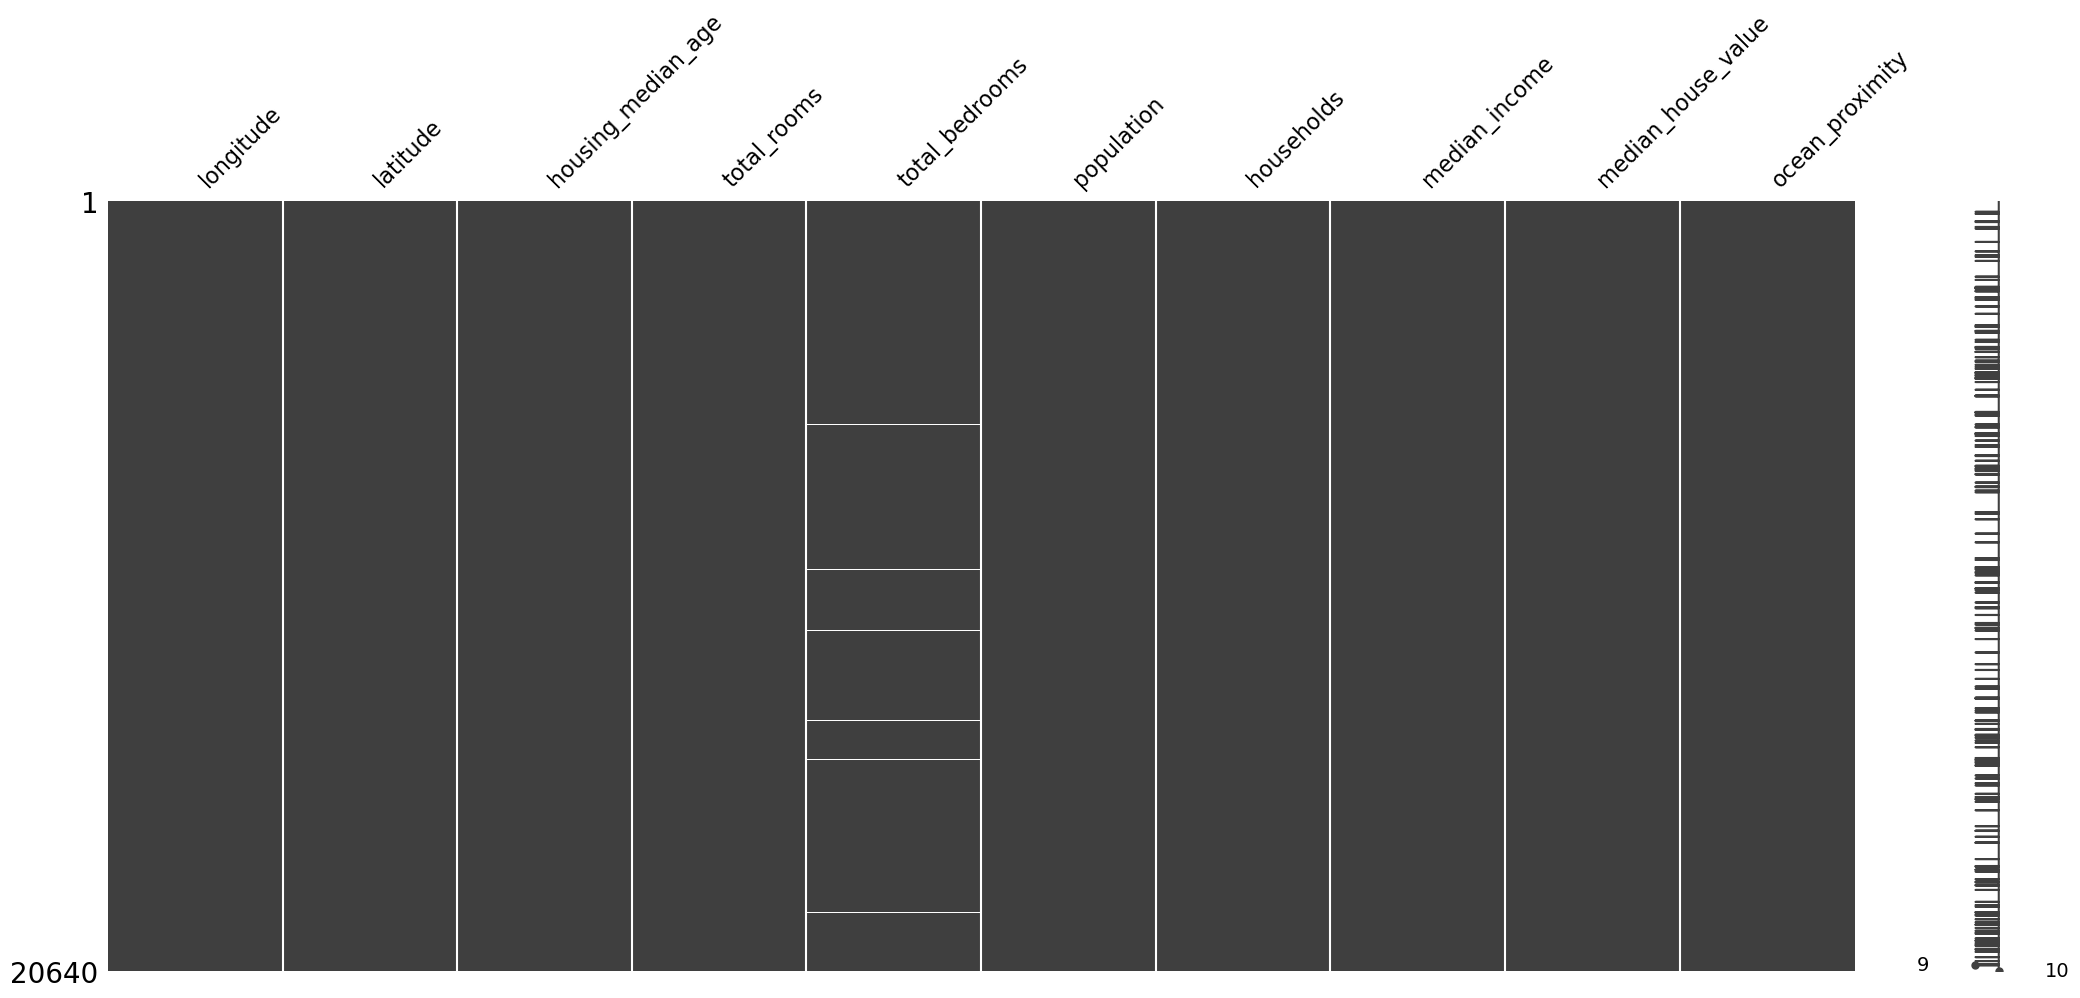

In [6]:
msno.matrix(df)

In [7]:
df.isna().sum()


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<Axes: >

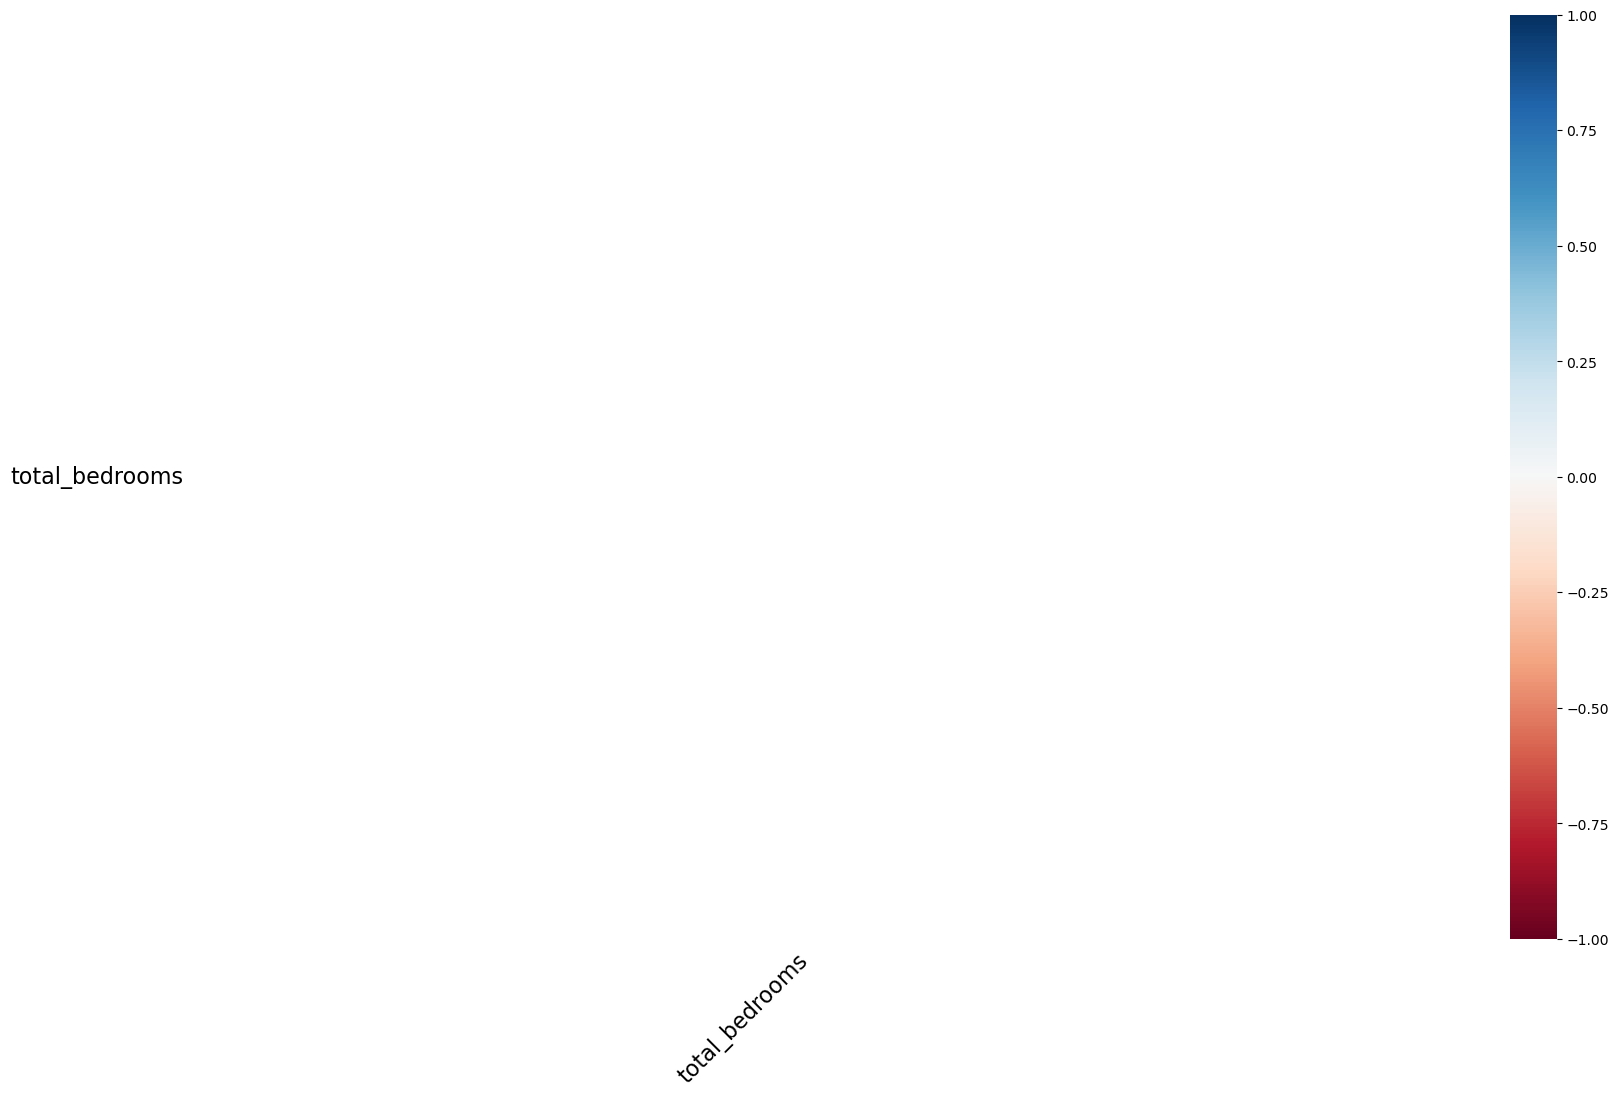

In [8]:
msno.heatmap(df)

In [9]:
df.drop(columns="ocean_proximity").columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

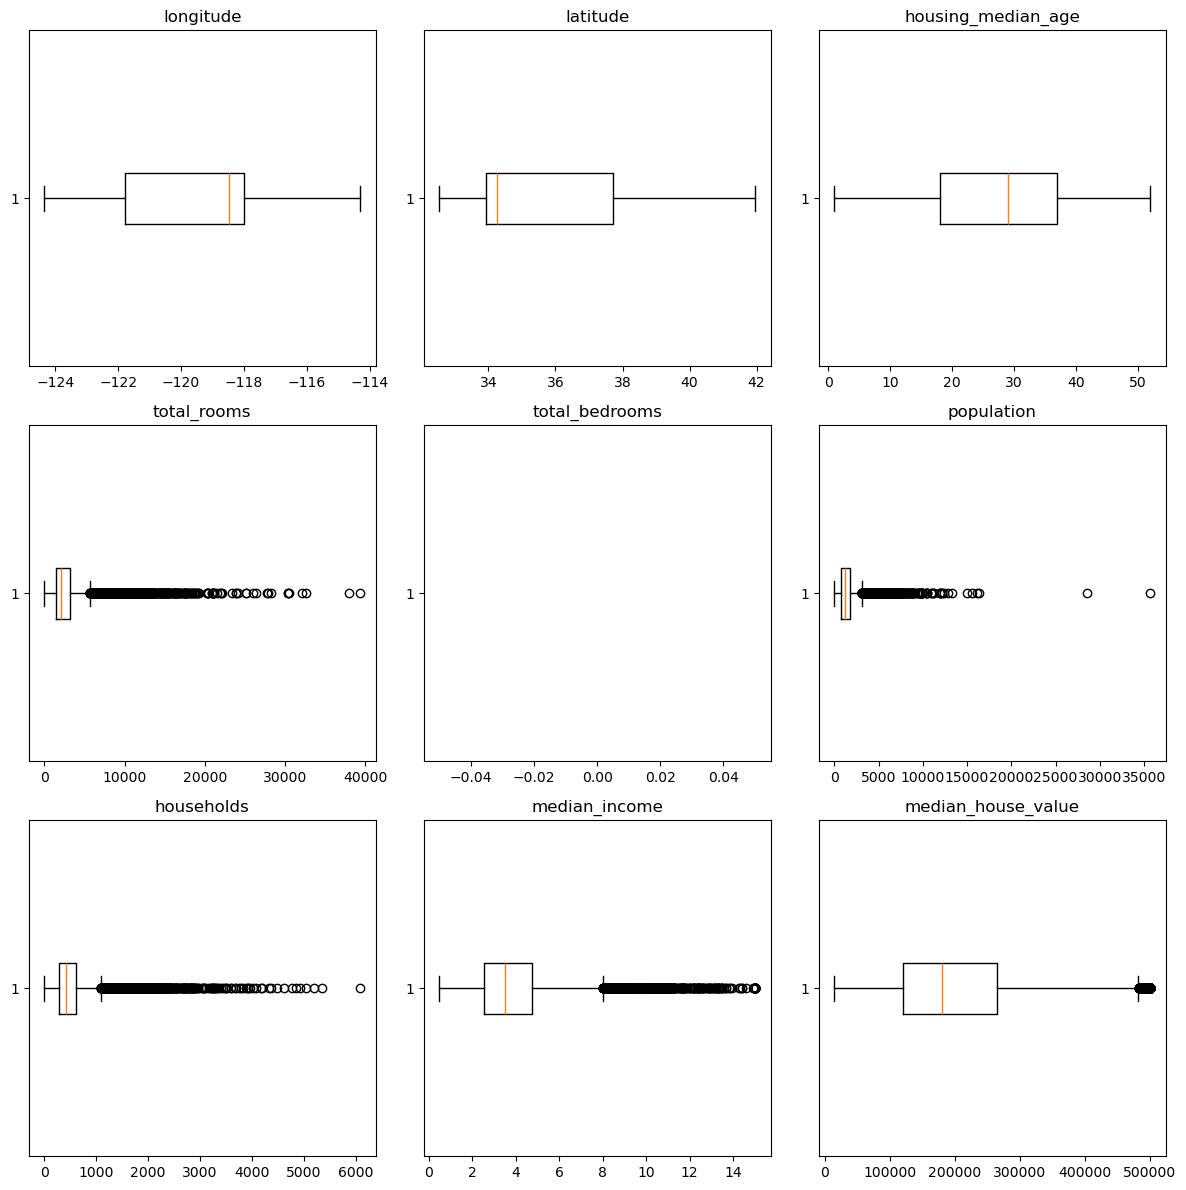

In [10]:
fig,axs=plt.subplots(3,3,figsize=(12,12))
axs=axs.flatten()
cols=df.drop(columns="ocean_proximity").columns
for i,col in enumerate(cols):
    axs[i].boxplot(df[col],vert=False)
    axs[i].set_title(col)


plt.tight_layout()
plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# drop missing raw that have missing total_bedroom value

In [12]:
# mean_df = (df[df['total_bedrooms'].notnull()]
#            .groupby(['households', 'total_rooms'])['total_bedrooms']
#            .mean()
#            .reset_index()
#            .rename(columns={'total_bedrooms': 'mean_bedrooms'}))


# df = df.merge(mean_df, on=['households', 'total_rooms'], how='left')


# df['total_bedrooms'] = df['total_bedrooms'].fillna(df['mean_bedrooms'])


# df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mean())


# df = df.drop('mean_bedrooms', axis=1)


# imputer=SimpleImputer(strategy="mean")
# df["total_bedrooms"]=imputer.fit_transform(df[["total_bedrooms"]])




df.dropna(inplace=True)
df=df.reset_index(drop=True)

In [13]:
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20428    -121.09     39.48                25.0       1665.0           374.0   
20429    -121.21     39.49                18.0        697.0           150.0   
20430    -121.22     39.43                17.0       2254.0           485.0   
20431    -121.32     39.43                18.0       1860.0           409.0   
20432    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20428       845.0       330.0         1.5603             78100.0   
20429       356.0       114.0         2.5568             77100.0   
20430      1007.0       433.0         1.7000             92300.0   
20431       741.0       349.0         1.8672             84700.0   
20432      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20428          INLAND  
20429          INLAND  
20430          INLAND  
20431          INLAND  
20432          INLAND  

[20433 rows x 10 columns]

In [14]:
# winsor=Winsorizer(capping_method='iqr',tail="both",fold=1.5)
# fig,axs=plt.subplots(3,3,figsize=(12,12))
# axs=axs.flatten()
# cols=df.drop(columns="ocean_proximity").columns
# for i,col in enumerate(cols):
#     df[col]=winsor.fit_transform(df[[col]])
#     axs[i].boxplot(df[col],vert=False)
#     axs[i].set_title(col)


# plt.tight_layout()
# plt.show()

# look at skewness and check correleation

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

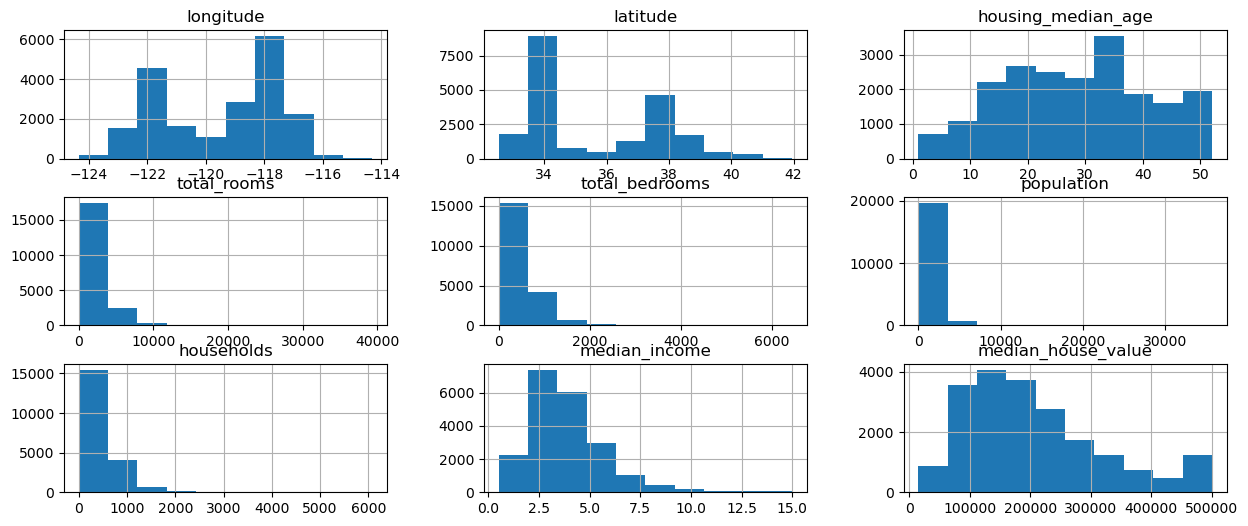

In [15]:
df.hist(figsize=(15,6))

In [16]:
numeric=df.select_dtypes(['int','float'])

numeric.corr()

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924616           -0.109357     0.045480   
latitude            -0.924616  1.000000            0.011899    -0.036667   
housing_median_age  -0.109357  0.011899            1.000000    -0.360628   
total_rooms          0.045480 -0.036667           -0.360628     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.100270 -0.108997           -0.295787     0.857281   
households           0.056513 -0.071774           -0.302768     0.918992   
median_income       -0.015550 -0.079626           -0.118278     0.197882   
median_house_value  -0.045398 -0.144638            0.106432     0.133294   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.100270    0.056513      -0.015550   
latitude                 -0.066983   -0.108997   -0.071774      -0.079626   
housing_median_age       -0.320451   -0.295787   -0.302768      -0.118278   
total_rooms               0.930380    0.857281    0.918992       0.197882   
total_bedrooms            1.000000    0.877747    0.979728      -0.007723   
population                0.877747    1.000000    0.907186       0.005087   
households                0.979728    0.907186    1.000000       0.013434   
median_income            -0.007723    0.005087    0.013434       1.000000   
median_house_value        0.049686   -0.025300    0.064894       0.688355   

                    median_house_value  
longitude                    -0.045398  
latitude                     -0.144638  
housing_median_age            0.106432  
total_rooms                   0.133294  
total_bedrooms                0.049686  
population                   -0.025300  
households                    0.064894  
median_income                 0.688355  
median_house_value            1.000000

<Axes: >

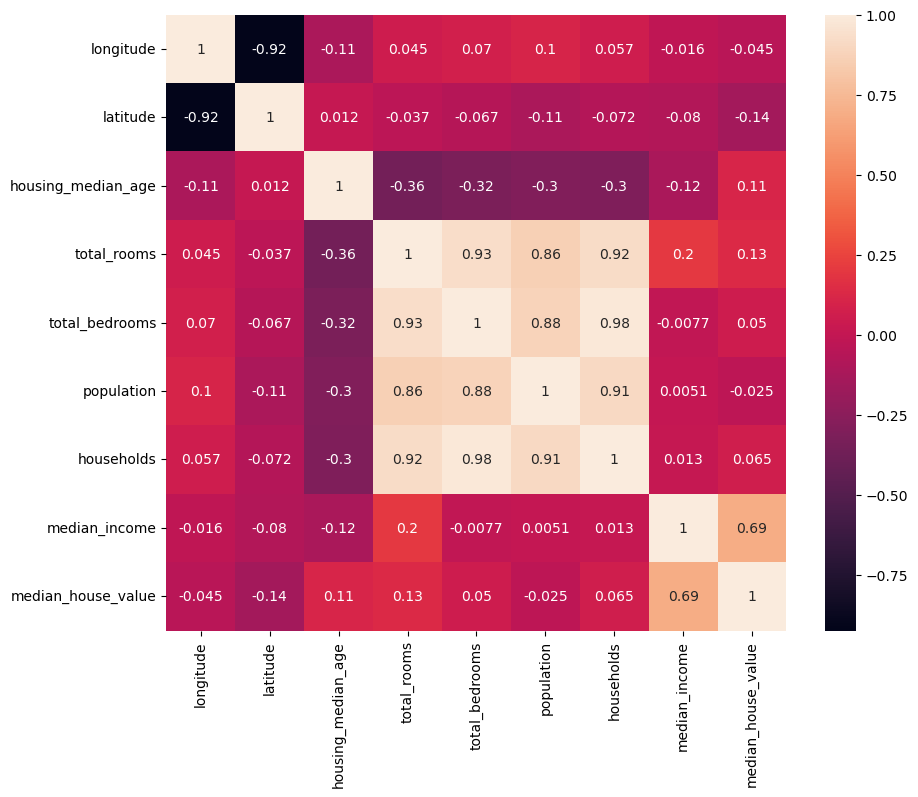

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(numeric.corr(),annot=True)

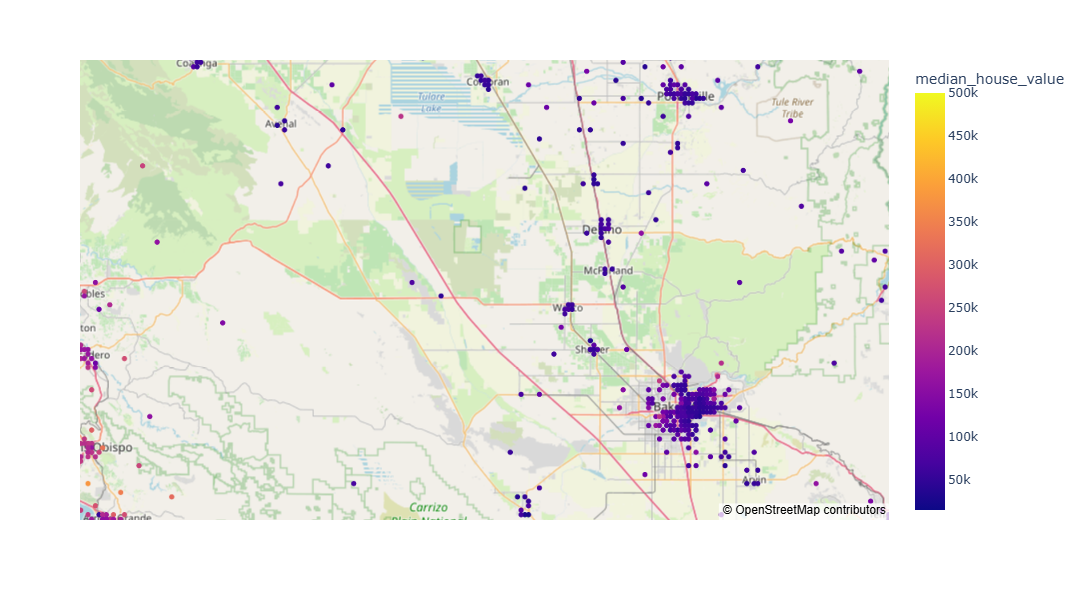

In [18]:
fig=px.scatter_mapbox(df,lat="latitude",lon="longitude",width=1000,height=600,color="median_house_value")
fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [19]:
def imp(df,col):
    df[col]=np.log(df[col]+1)
    return df

# getting ratio of bedrooms among all rooms also check ratio between households and bedrooms 

In [30]:
df["bedroom_ratio"]=df["total_bedrooms"]/df["total_rooms"]
df["hosehold_room"]=df["total_bedrooms"]/df["households"]

In [31]:
numeric=df.select_dtypes(['int','float'])

# using boxcox to fix skewness and use onehotencoding for ocean proximity

In [32]:
# imp(df,"total_bedrooms")
# imp(df,"total_rooms")
# imp(df,"households")
# imp(df,"population")
# imp(df,"total_rooms")
# imp(df,"households")
for col in numeric.columns:
    if(df[col]>0).all():
        transform,lam=stats.boxcox(df[col])
        df[col]=transform

In [33]:
encoder=OneHotEncoder()
enc=encoder.fit_transform(df[["ocean_proximity"]])
enc=enc.toarray()
onehot=pd.DataFrame(enc,columns=encoder.get_feature_names_out(["ocean_proximity"]))

In [34]:
df=pd.concat([df,onehot],axis=1)

<Axes: >

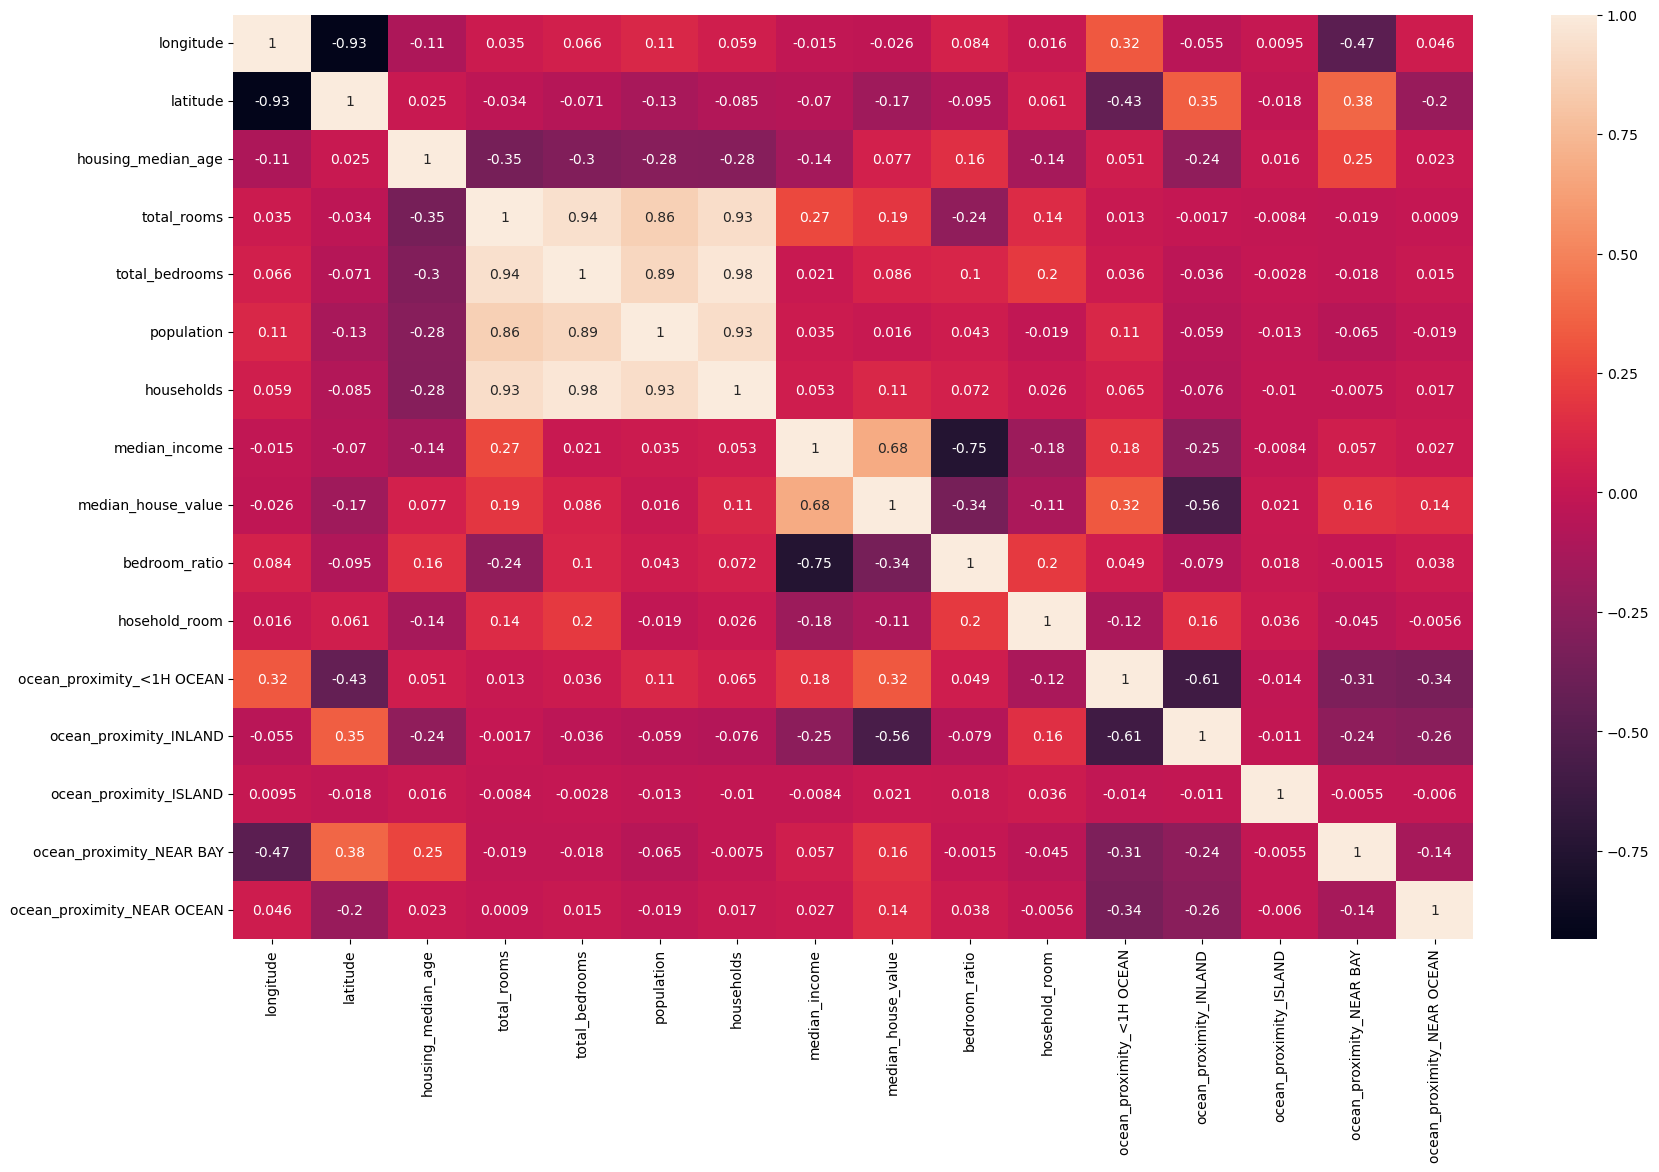

In [37]:
plt.figure(figsize=(20,12))
sns.heatmap(df.drop(columns="ocean_proximity").corr(),annot=True)

# Splitting data for training and testing 

In [40]:
x=df.drop(columns=['median_house_value','ocean_proximity'])
y=df['median_house_value']

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### creating scaled data

In [42]:
scale=StandardScaler()
x_s=scale.fit_transform(x_train)
x_test_s=scale.transform(x_test)

In [43]:
x_s

array([[-1.10651441,  0.89045687, -1.16622298, ..., -0.01354861,
        -0.35636982, -0.38540693],
       [-0.02467137,  0.62884118,  0.38339386, ..., -0.01354861,
        -0.35636982, -0.38540693],
       [ 0.75804456, -0.65819999, -0.23964397, ..., -0.01354861,
        -0.35636982, -0.38540693],
       ...,
       [ 0.5785683 , -0.72859919,  1.0505029 , ..., -0.01354861,
        -0.35636982, -0.38540693],
       [-1.22616525,  0.97941377, -1.34777953, ..., -0.01354861,
         2.80607376, -0.38540693],
       [-1.42059787,  1.03444675,  1.76026037, ..., -0.01354861,
         2.80607376, -0.38540693]])

# training two models ridge to reduce coffecient and linear regression

In [44]:
model_r=Ridge()
model_l=LinearRegression()


model_r.fit(x_s,y_train)

#///////////////////////////


model_l.fit(x_s,y_train)

LinearRegression()

In [45]:
r_pred=model_r.predict(x_test)

C:\Users\omarg\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but Ridge was fitted without feature names



## evaluate the results of both

In [46]:
model_r.score(x_test_s,y_test)

0.6945613789476884

In [47]:
model_l.score(x_test_s,y_test)

0.6946602541351115

## using random forest with evalutaion

In [48]:
forest = RandomForestRegressor()
forest.fit(x_s,y_train)
forest.score(x_test_s,y_test)

0.8386256431205946